In [1]:
%matplotlib inline
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing

In [60]:
df = pd.read_csv('../dataset/complete_dataset.csv')

/Users/lennartkeller/opt/anaconda3/envs/clustering/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (0,1,3,5,6,7,8,9,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [61]:
#df.text = df.text.str.replace(r'\(.*?\)', '')

In [62]:
df.dropna(subset=['year', 'writers', 'titleType', 'runtimeMinutes'], inplace=True)
df.drop_duplicates(subset='IMDB_ID', inplace=True)
df.year = df.year.astype('int32')
df = df[df['titleType'] == 'movie']

In [63]:
df.head()

,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes
706,6416324.xml,Der Roman von Alexandre Dumas dem Älteren hatt...,tt1104767,"Adventure,Drama,History",1943,French,untokenisiert,90,"nm0894509,nm0148602","nm0241416,nm0816458,nm0763376,nm0812731",movie,The Count of Monte Cristo - Part 2: Retribution,"Le comte de Monte Cristo, 2ème époque: Le chât...",0.0,1943.0,NaN,90,7.0,80.0
2784,4732286.xml,Hände hoch oder ich schieße ( 1966 ) dTV - MDR...,tt1631717,Comedy,1966,German,untokenisiert,75,nm0440757,"nm0440757,nm0833141,nm1127102",movie,Hände hoch oder ich schieße,Hände hoch oder ich schieße,0.0,1966.0,NaN,75,5.8,36.0
3085,6122081.xml,"Hallo , Manuela ? Störe ich ? Kann ich zu dir ...",tt1271979,Drama,1967,French,untokenisiert,78,nm0816215,nm0816215,movie,La lune avec les dents,La lune avec les dents,0.0,1967.0,NaN,78,7.0,34.0
6281,5618549.xml,"Na los , iss jetzt schnell auf . Junge , ist d...",tt1065116,Action,1979,Japanese,untokenisiert,96,nm0814232,"nm0032816,nm0793999,nm0814232",movie,Sûpâ gun redei Wani Bunsho,Sûpâ gun redei Wani Bunsho,0.0,1979.0,NaN,96,5.7,44.0
10796,4208202.xml,Was geht auf diesem Land von Fluss Ganga heutz...,tt1454012,"Action,Crime,Drama",1991,Hindi,untokenisiert,154,nm0385758,"nm3485154,nm0030116,nm0385758,nm1178697",movie,Kaun Kare Kurbanie,Kaun Kare Kurbanie,0.0,1991.0,NaN,154,3.4,39.0


In [64]:
df.shape

(3663, 19)

## Load imdb persons file

In [65]:
persons_df = pd.read_csv('../dataset/persons.tsv', sep='\t')
persons_df.shape

(10085356, 6)

In [66]:
persons_df.set_index('nconst', inplace=True)

In [67]:
persons_df.head()

,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
nconst,,,,,
nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0050419,tt0043044,tt0053137"
nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0038355,tt0071877,tt0037382"
nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,producer","tt0059956,tt0049189,tt0054452,tt0057345"
nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0072562,tt0077975,tt0078723,tt0080455"
nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0060827,tt0050986,tt0050976,tt0083922"


In [68]:
persons_df.loc['nm0000001'].primaryName

'Fred Astaire'

## Get only movies with one single writer

In [69]:
#df = df[[len(entry) == 1 for entry in df.writers.str.split(',')]]
df.shape

(3663, 19)

# Analyze writers

In [14]:
writers = df.writers.str.split(',')

In [15]:
df['single_writer'] = df['writers'].apply(lambda x: True if len(x.split(',')) == 1 else False)
df['n_writers'] = df['writers'].apply(lambda x: len(x.split(',')))

In [16]:
df.n_writers.describe()

count    16694.00000
mean         3.32934
std          1.98242
min          1.00000
25%          2.00000
50%          3.00000
75%          4.00000
max         25.00000
Name: n_writers, dtype: float64

In [17]:
from collections import Counter
writers = Counter((writer for entry in writers for writer in entry))

In [18]:
len(writers)

11051

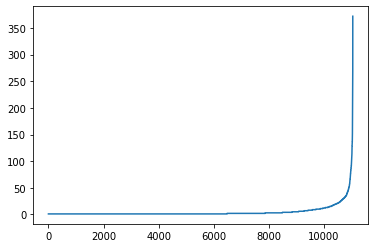

In [19]:
plt.plot(list(sorted(writers.values())))
plt.show()

In [20]:
for writer_id, value in writers.most_common(20):
    print(f'Writer:\n{persons_df.loc[writer_id]} \n\nMovies:  {value}\n\n{"#"*70}')

Writer:
primaryName                                      Chuck Lorre
birthYear                                               1952
deathYear                                                 \N
primaryProfession           writer,producer,music_department
knownForTitles       tt0369179,tt0898266,tt2660806,tt0118303
Name: nm0521143, dtype: object 

Movies:  372

######################################################################
Writer:
primaryName                                    Greg Berlanti
birthYear                                               1972
deathYear                                                 \N
primaryProfession                   producer,writer,director
knownForTitles       tt3107288,tt2193021,tt1133985,tt5164432
Name: nm0075528, dtype: object 

Movies:  269

######################################################################
Writer:
primaryName                                 Andrew Kreisberg
birthYear                                               1971
deathYea

# Test: Try to predict wether a single vs mulitple writer(s)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from stop_words import get_stop_words
from imblearn.under_sampling import RandomUnderSampler

In [43]:
df_train, df_test = train_test_split(df.sample(frac=0.2))

In [44]:
#feat_trans = TfidfVectorizer(max_features=20000, stop_words=get_stop_words('de'))
#
#X_train = feat_trans.fit_transform(df_train.text)
#X_test = feat_trans.transform(df_test.text)

In [61]:
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.feature_extraction.text import TfidfVectorizer
from stop_words import get_stop_words
from sklearn.pipeline import make_pipeline, make_union

from joblib import Memory
location = './cachedir'
memory = Memory(location, verbose=0)

pos_pipe = make_pipeline(
    POSTransformer(
        verbose=True),
    TfidfVectorizer(
        ngram_range=(1,2)),
    memory=memory
)

token_tdidf = make_pipeline(
    TfidfVectorizer(
        ngram_range=(1,2),
        stop_words=get_stop_words('de'),
        max_features=10000)
)

union = make_union(
    pos_pipe,
    token_tdidf,
    
)

X_train = union.fit_transform(df_train.text)
X_test = union.transform(df_test.text)

  6%|▌         | 48/835 [00:25<06:57,  1.89it/s]


KeyboardInterrupt: 

In [57]:
y_train = df_train.single_writer
y_test = df_test.single_writer

In [58]:
#X_train, y_train = RandomUnderSampler().fit_resample(X_train, y_train)

In [59]:
clf = LinearSVC().fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.82      1.00      0.90       689
        True       0.00      0.00      0.00       146

    accuracy                           0.82       835
   macro avg       0.41      0.50      0.45       835
weighted avg       0.68      0.82      0.75       835



In [21]:
#sample = df[(df.writers.str.contains('nm0000005')) | (df.writers.str.contains('nm0000095'))]
#sample = df[(df.writers.str.contains('nm0000108'))]
#sample = df[((df.year <= 1990) & (1995 >= df.year))]
#sample = df.sample(frac=0.1)
sample = df

In [22]:
sample.shape

(16694, 21)

In [50]:
import spacy
import re
import numpy as np
from sklearn.base import TransformerMixin, BaseEstimator
from typing import Iterable, List
from tqdm import tqdm

class POSTransformer(TransformerMixin, BaseEstimator):
    
    def __init__(self, spacy_model: str ='de_core_news_sm', verbose: bool = False):
        self.spacy_model = spacy_model
        self.verbose = verbose     
    
    def fit(self, X, y=None):
        return self

    def transform(self, X: Iterable[str],  y=None):
        pos_tags = set()
        nlp = spacy.load(self.spacy_model)
        Xt = []
        X = tqdm(X) if self.verbose else X
        for x in X:
            doc = nlp(x)
            Xt.append(" ".join([token.pos_ for token in doc]))
        self.tags__ = list(pos_tags)
        return Xt

class SentenceMarkCounter(TransformerMixin):
    
    def __init__(self,
                 marks: List[str] = None,
                 normalize: bool = True,
                 verbose: bool = False,
                 *args,
                 **kwargs):
        self.marks = marks if marks else [r'\.', r'\?', r'!', r'\.{3}']
        self.verbose = verbose
        self.normalize = normalize
        super().__init__(*args, **kwargs)
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        Xt = []
        X = tqdm(X) if self.verbose else X
        for x in X:
            xt = np.array([len(re.findall(mark, x)) for mark in self.marks])
            if self.normalize:
                xt = xt / len(x)
            Xt.append(xt)
        return np.asarray(Xt)        

In [81]:
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.feature_extraction.text import TfidfVectorizer
from stop_words import get_stop_words
from sklearn.pipeline import make_pipeline, make_union

from joblib import Memory
location = './cachedir'
memory = Memory(location, verbose=0)

pos_pipe = make_pipeline(
    POSTransformer(
        verbose=True),
    TfidfVectorizer(
        ngram_range=(1,2)),
    memory=memory
)

token_tdidf = make_pipeline(
    TfidfVectorizer(
        ngram_range=(1,2),
        stop_words=get_stop_words('de'),
        max_features=10000)
)

union = make_union(
    #pos_pipe,
    token_tdidf,
    
)

X = union.fit_transform(sample.text)

pca = PCA(n_components=2)

Xr = pca.fit_transform(X.todense())

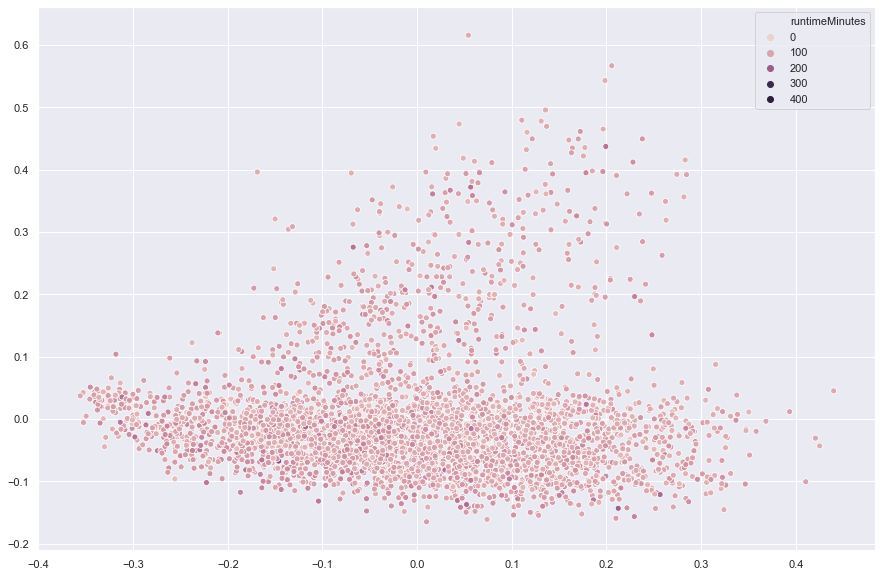

In [87]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15, 10)})
p = sns.scatterplot(x=Xr[:, 0], y=Xr[:, 1], data=sample, hue='runtimeMinutes')

In [ ]:
sum(pca.explained_variance_)

In [ ]:
from yellowbrick.text import UMAPVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
umap = UMAPVisualizer()
umap.fit(X, sample.single_writer)
umap.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from stop_words import get_stop_words

X = TfidfVectorizer(
    #ngram_range=(1,1),
    #stop_words=get_stop_words('de')
).fit_transform(sample.text)

In [ ]:
from sklearn.cluster import DBSCAN, KMeans

In [ ]:
from sklearn.base import ClusterMixin
import matplotlib.pyplot as plt
from typing import Iterable
import numpy as np
from sklearn.base import clone
import time 

def elbow(clu: ClusterMixin, X: np.array, ks: Iterable[int] = tuple(range(2, 11))):
    inertia_values = []
    for k in ks:
        current_clu = clone(clu)
        current_clu.fit(X)
        inertia_values.append(current_clu.inertia_)
        del current_clu
    return inertia_values

In [ ]:
inertias = elbow(KMeans(n_jobs=-1), X)

In [ ]:
plt.plot(list(range(2, 11)), inertias)
plt.show()

In [ ]:
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation

clu = AffinityPropagation()

clu.fit(X)

In [ ]:
clu.labels_

In [ ]:
import umap
umap = umap.UMAP(n_components=2)
Xr = umap.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
Xr = pca.fit_transform(X.todense())

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.scatterplot(x=Xr[:, 0], y=Xr[:, 1], data=sample, hue=[f'Cluster {i+1}' for i in clu.labels_])
plt.show()

In [ ]:
plt.hist(clu.labels_, bins=len(set(clu.labels_)))
plt.show()